In [8]:
import pandas as pd
import numpy as np
import os
working_dir = '/Users/nkarisan/PycharmProjects/sequents_barcodes_homology'
os.chdir(working_dir)

from scripts.my_library import MyLib
from scripts.poset import Poset, DepMapExperiments

In [9]:
import matplotlib

matplotlib.use("nbagg")


%matplotlib inline
%config InlineBackend.figure_format = "retina"


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Figure 3: Toy Example


In [10]:
gamma_df = pd.DataFrame(np.asarray([[1, 0], [1, 1], [1, 1], [1, 1], [0, 1]]), columns=['a', 'b'])
gamma_df

,a,b
0,1,0
1,1,1
2,1,1
3,1,1
4,0,1


In [11]:
delta_df = pd.DataFrame(np.asarray([[1, 0], [1, 0], [1, 1], [0, 1], [0, 1]]), columns=['x', 'y'])
delta_df

,x,y
0,1,0
1,1,0
2,1,1
3,0,1
4,0,1


0  /  4
1  /  4
1  /  4
1  /  4
1  /  4
2  /  4
2  /  4
2  /  4
2  /  4
2  /  4
2  /  4
3  /  4
3  /  4
3  /  4
3  /  4
number of elements: 16
number of relations: 32

File /Users/nkarisan/PycharmProjects/sequents_barcodes_homology/output_files/poset_figure3.pkl saved, data size:  16


0=======bar length: inf ======
[1, inf]
[] |-- []

1=======bar length: 0.6 ======
[0.4, 1]
[] |-- ['x']
[0.4, 1]
[] |-- ['y']

2=======bar length: 0.4 ======
[0.0, 0.4]
[] |-- ['x', 'y']

3=======bar length: 0.2 ======
[0.2, 0.4]
['a'] |-- ['x']
[0.2, 0.4]
['b'] |-- ['y']
[0.6, 0.8]
['a', 'b'] |-- []

4=======bar length: 0.2 ======
[0.8, 1]
['a'] |-- []
[0.8, 1]
['b'] |-- []


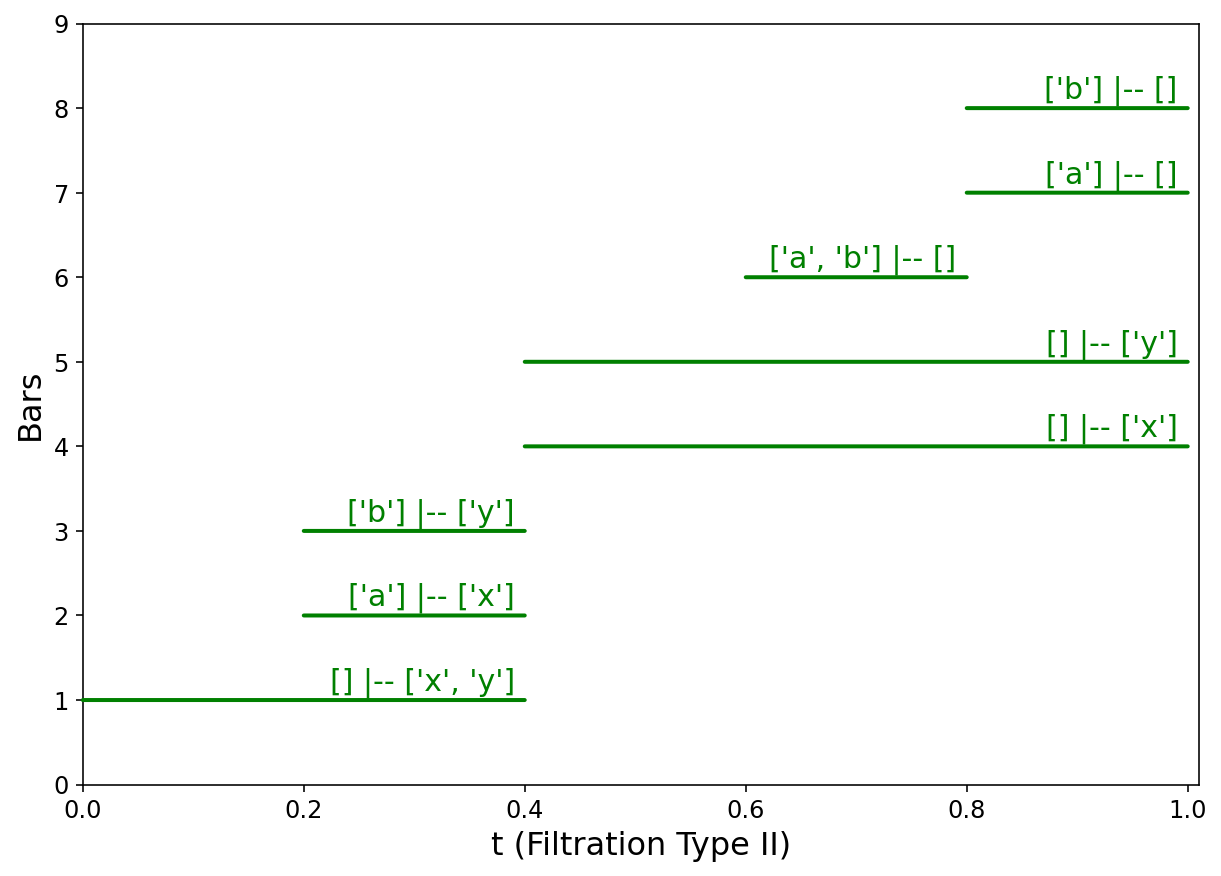

In [14]:
filename = 'figure3'
bars, bars_length_dic, max_end_t = Poset.create_barcode_sequents(gamma_df, delta_df, poset_nx=None, KEEP_TRIVIAL=True, filename=filename)
Poset.summarize_barcode_and_visualize(bars, bars_length_dic, max_end_t, fontsize_text=15, filename=filename)

# Figure 11: DepMap Example

In [15]:
feat_file = 'depmap_files/lbls_Features_21Q4.hdf5'
feat_df = MyLib.load_h5py(feat_file)
feat_df.rename(columns={col: col.split()[0] + '_' + col.split('_')[1] for col in feat_df.columns}, inplace=True)

input_files/depmap_files/lbls_Features_21Q4.hdf5  is loaded, shape:  (894, 85364)



In [16]:
dependency_file = 'depmap_files/lbls_Achilles_gene_dependency.hdf5'
target_df = MyLib.load_h5py(dependency_file)
target_df.rename(columns={col: col.split()[0] for col in target_df.columns}, inplace=True)

input_files/depmap_files/lbls_Achilles_gene_dependency.hdf5  is loaded, shape:  (894, 18017)



In [17]:
left_l = ['KRAS', 'BRAF', 'NRAS']  #'HRAS'
right_l = ['KRAS', 'BRAF', 'NRAS']  # 'HRAS',
gamma_df, delta_df = DepMapExperiments.process_data(feat_df, target_df, left_l, right_l)

gamma shape: (894, 9)
delta shape: (894, 3)


In [18]:
gamma_df

,KRAS_Hot,BRAF_Hot,NRAS_Hot,KRAS_Dam,BRAF_Dam,NRAS_Dam,KRAS_NonCon,BRAF_NonCon,NRAS_NonCon
ACH-000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000007,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
ACH-000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
ACH-002461,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ACH-002465,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ACH-002508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-002510,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
delta_df

,KRAS,BRAF,NRAS
ACH-000004,0,0,0
ACH-000005,1,0,0
ACH-000007,1,0,0
ACH-000009,1,0,0
ACH-000011,0,0,0
...,...,...,...
ACH-002461,0,0,0
ACH-002465,1,0,0
ACH-002508,1,1,1
ACH-002510,0,1,0


For the DepMap barcode plot trivial bars are removed. 

In [20]:
filename = 'depmap'
bars, bars_length_dic, max_end_t = Poset.create_barcode_sequents(gamma_df, delta_df, poset_nx=None, KEEP_TRIVIAL=False, filename=filename)

0  /  12
1  /  12
1  /  12
1  /  12
1  /  12
1  /  12
1  /  12
1  /  12
1  /  12
1  /  12
1  /  12
1  /  12
1  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
2  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3  /  12
3


0=======bar length: 0.153 ======
[0.007, 0.16]
['KRAS_NonCon'] |-- ['KRAS']

1=======bar length: 0.15 ======
[0.002, 0.152]
['KRAS_Hot'] |-- ['KRAS']

2=======bar length: 0.078 ======
[0.039, 0.117]
['BRAF_NonCon'] |-- ['BRAF']

3=======bar length: 0.076 ======
[0.012, 0.088]
['BRAF_Hot'] |-- ['BRAF']

4=======bar length: 0.054 ======
[0.007, 0.06]
['NRAS_NonCon'] |-- ['NRAS']

5=======bar length: 0.051 ======
[0.066, 0.117]
['BRAF_NonCon'] |-- ['KRAS']

6=======bar length: 0.049 ======
[0.003, 0.053]
['NRAS_Hot'] |-- ['NRAS']

7=======bar length: 0.034 ======
[0.055, 0.088]
['BRAF_Hot'] |-- ['KRAS']

8=======bar length: 0.025 ======
[0.135, 0.16]
['KRAS_NonCon'] |-- ['BRAF']

9=======bar length: 0.023 ======
[0.129, 0.152]
['KRAS_Hot'] |-- ['BRAF']

10=======bar length: 0.022 ======
[0.017, 0.039]
['BRAF_NonCon'] |-- ['BRAF', 'KRAS']

11=======bar length: 0.019 ======
[0.041, 0.06]
['NRAS_NonCon'] |-- ['KRAS']

12=======bar length: 0.017 ======
[0.036, 0.053]
['NRAS_Hot'] |-- ['KRAS'

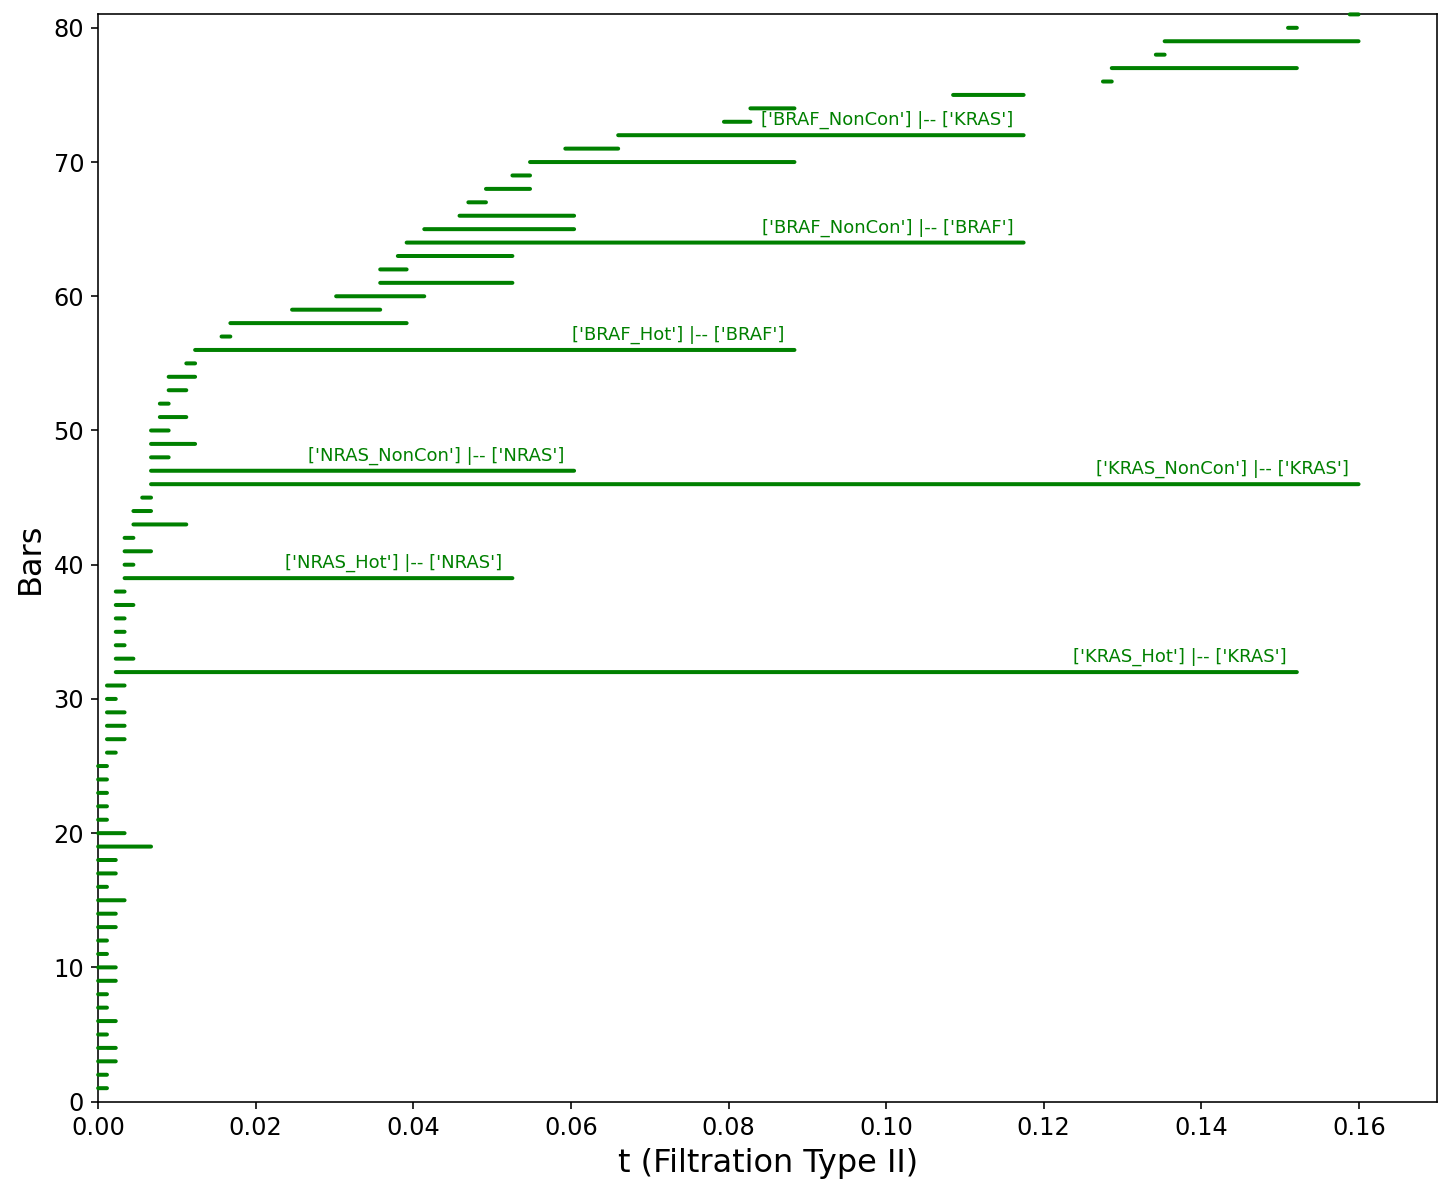

In [21]:
Poset.summarize_barcode_and_visualize(bars, bars_length_dic, max_end_t, fontsize_text=9, figure_width=12, figure_height=10, filename=filename)

## DepMap Correlation Test

In [13]:
MyLib.compute_correlations(gamma_df, delta_df)

,KRAS,BRAF,NRAS
KRAS_Hot,0.375597,0.023606,-0.115942
BRAF_Hot,-0.102434,0.660199,-0.022014
NRAS_Hot,-0.106161,0.097263,0.729580
KRAS_Dam,0.030661,-0.013240,0.111395
BRAF_Dam,0.012038,0.051192,0.045249
NRAS_Dam,-0.051680,-0.018734,-0.014225
KRAS_NonCon,0.363058,0.023597,-0.120012
BRAF_NonCon,-0.077289,0.566588,-0.008716
NRAS_NonCon,-0.116472,0.078114,0.741769


# Example: Synthetic Data

In [14]:
# sim_file = 'synthetic/Sim_eps0-05_And.csv'
# sim_file = 'synthetic/Sim_eps0-05_k3_And.csv'
sim_file = 'synthetic/Sim_eps005_k[2, 3]_And.csv'

sim_data_df = MyLib.load_csv(sim_file)
sim_data_df

input_files/synthetic/Sim_eps005_k[2, 3]_And.csv  is loaded, shape:  (500, 17)



,pheno0,pheno1,pheno2,pheno3,pheno4,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11
0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1
1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1
2,1,1,0,1,0,1,1,0,0,1,1,0,0,1,1,1,1
3,1,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1
4,1,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,0,0,1,0,0,0,1,1,1,1,1,0,1,1,1,1
496,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1
497,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1
498,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [15]:
gamma_df = sim_data_df[list(sim_data_df.columns)[5:]]
delta_df = sim_data_df[list(sim_data_df.columns)[0:5]]
delta_df

,pheno0,pheno1,pheno2,pheno3,pheno4
0,0,0,0,0,0
1,1,1,0,0,0
2,1,1,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
495,1,0,0,1,0
496,1,1,1,1,1
497,1,1,1,1,1
498,0,1,0,0,0


In [16]:
filename = 'synthetic'
bars, bars_length_dic, max_end_t = Poset.create_barcode_sequents(gamma_df, delta_df, poset_nx=None, KEEP_TRIVIAL=False, filename=filename)

0  /  17
1  /  17
1  /  17
1  /  17
1  /  17
1  /  17
1  /  17
1  /  17
1  /  17
1  /  17
1  /  17
1  /  17
1  /  17
1  /  17
1  /  17
1  /  17
1  /  17
1  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2  /  17
2

In [17]:
# filename = 'synthetic'
# poset_file = f'output_files/poset_{filename}.pkl'
# poset_nx = MyLib.load_pkl(poset_file)
# bars, bars_length_dic, max_end_t = Poset.create_barcode_sequents(gamma_df, delta_df, poset_nx=poset_nx, KEEP_TRIVIAL=False, filename=filename)


0=======bar length: 0.278 ======
[0.222, 0.5]
['var1'] |-- ['pheno1']

1=======bar length: 0.27 ======
[0.23, 0.5]
['var9'] |-- ['pheno1']

2=======bar length: 0.252 ======
[0.248, 0.5]
['var9'] |-- ['pheno0']

3=======bar length: 0.246 ======
[0.254, 0.5]
['var4'] |-- ['pheno0']

4=======bar length: 0.234 ======
[0.014, 0.248]
['var4', 'var9'] |-- ['pheno0']

5=======bar length: 0.21 ======
[0.012, 0.222]
['var1', 'var9'] |-- ['pheno1']

6=======bar length: 0.166 ======
[0.334, 0.5]
['var7'] |-- ['pheno2']

7=======bar length: 0.164 ======
[0.336, 0.5]
['var0'] |-- ['pheno1']
[0.336, 0.5]
['var10'] |-- ['pheno1']

8=======bar length: 0.162 ======
[0.338, 0.5]
['var4'] |-- ['pheno1']

9=======bar length: 0.16 ======
[0.34, 0.5]
['var3'] |-- ['pheno1']
[0.34, 0.5]
['var5'] |-- ['pheno2']

10=======bar length: 0.158 ======
[0.342, 0.5]
['var1'] |-- ['pheno0']
[0.342, 0.5]
['var5'] |-- ['pheno1']

11=======bar length: 0.156 ======
[0.344, 0.5]
['var8'] |-- ['pheno2']

12=======bar length

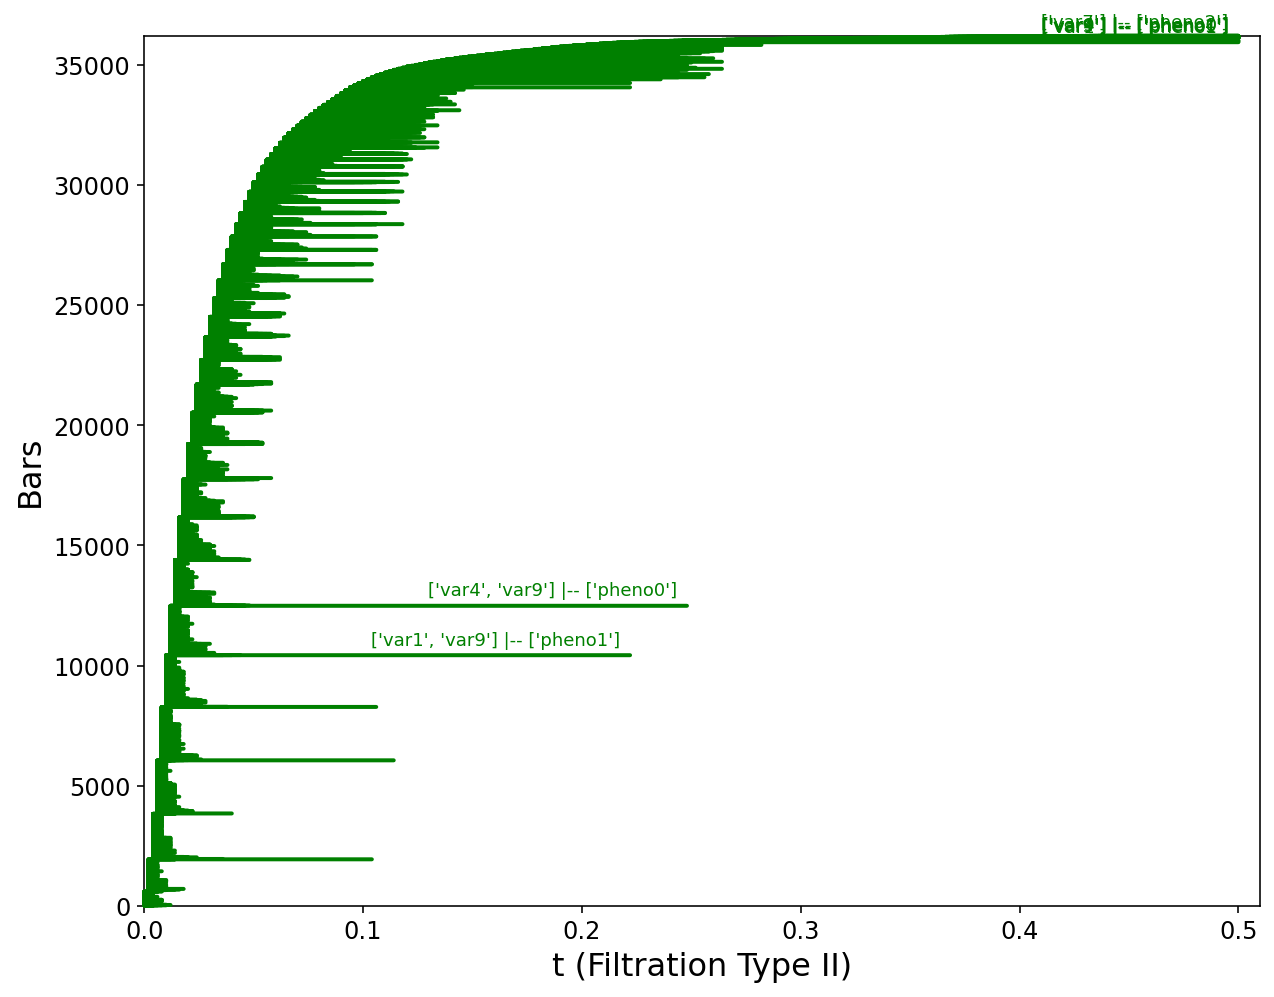

In [18]:
Poset.summarize_barcode_and_visualize(bars, bars_length_dic, max_end_t, fontsize_text=9, figure_width=10, figure_height=8, filename=filename)